# Data analysis in Python using built-in types

Date: June 22, 2019

-----

## Learning Objectives

* Using the command line to:
    + make directories
    + download files from internet
    + unzip `.zip` files
* Import a `.csv` file without [`pandas`](https://pandas.pydata.org/about.html) or [`numpy`](https://www.numpy.org/)
* Perform data analysis using built-in types
    + working with dates
    + sorting dictionaries
    + for loops and list comprehension
    + visualizing data with [`matplotlib`](https://matplotlib.org/index.html)

## Inspect Files in current working directory

In [ ]:
!ls

## Create a new `raw_data` directory

In [ ]:
!mkdir raw_data

Let's reinspect our working directory. By typing `ls -l`, we are getting more information about all files and folders such as when things were created.

In [ ]:
!ls -l

## Install Homebrew

[`homebrew`](https://brew.sh/) is the package manager for MacOS. This tutorial assumes that you have it installed on your machine.

*If not, please uncomment and run the cell below to install `homebrew`.*

In [ ]:
#/usr/bin/ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"

## Download necessary data

Let's download [King County, WA property sales data](https://info.kingcounty.gov/assessor/DataDownload/default.aspx) into our newly created `raw_data` directory. We'll be using the [`wget`](https://www.gnu.org/software/wget/) package to download local copies of files from the Internet. 

The default directory is the current working directory so we need to specify where `wget` should place the file via the `-P` flag.

```
# <> are placeholders so do not include them in your commands
wget <url> -P <file path>
```

*If you don't have `wget`, uncomment the cell below to have `brew` install it for you.*

In [2]:
!brew install wget

Updating Homebrew...
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> Updated Formulae
aliyun-cli                               json-fortran
angular-cli                              jvgrep
autorest                                 latexml
cfn-lint                                 ldc
circleci                                 librealsense
cointop                                  libuv
consul                                   minio
convox                                   minio-mc
cql                                      minizinc
cromwell                                 nave
datetime-fortran                         node
dehydrated                               noti
devspace                                 orc-tools
dhall-json                               pdf2htmlex
docker                                   pgbadger
docker-completion                        procs
drone-cli                                pulumi
emscripten                               reattach-t

In [3]:
!wget https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip -P raw_data/

--2019-06-28 13:47:02--  https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip
Resolving aqua.kingcounty.gov (aqua.kingcounty.gov)... 146.129.240.28
Connecting to aqua.kingcounty.gov (aqua.kingcounty.gov)|146.129.240.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124486612 (119M) [application/x-zip-compressed]
Saving to: ‘raw_data/Real Property Sales.zip’

Real Property Sales 100%[===================>] 118.72M  3.28MB/s    in 44s     

2019-06-28 13:47:46 (2.70 MB/s) - ‘raw_data/Real Property Sales.zip’ saved [124486612/124486612]



Let's inspect the contents of `raw_data` to verify that we have the data

In [4]:
!ls -l raw_data/

total 262208
-rw-r--r--  1 flatironschool  staff  124486612 Jun 22 01:18 Real Property Sales.zip


### Unzip `raw_data/Real Property Sales.zip`

Currently the data lives in a [`.zip`](http://cvs.bio.unc.edu/protocol/unzip-help/unzip-help.htm) file, which is essentially a layer that contains the actual data.

To extract - or unpeel - the contents within the `.zip` file, we'll use the [`unzip`](https://formulae.brew.sh/formula/unzip) command. 

By specifying `-d raw_data/`, we're telling `unzip` to place the contents of `raw_data/Real Property Sales.zip` inside the `raw_data/` directory.

*If you don't have `unzip`, uncomment the cell below to have `brew` install it for you.*

In [5]:
!brew install unzip


==> Downloading https://homebrew.bintray.com/bottles/unzip-6.0_4.mojave.bottle.t
######################################################################## 100.0%
==> Pouring unzip-6.0_4.mojave.bottle.tar.gz
==> Caveats
unzip is keg-only, which means it was not symlinked into /usr/local,
because macOS already provides this software and installing another version in
parallel can cause all kinds of trouble.

If you need to have unzip first in your PATH run:
  echo 'export PATH="/usr/local/opt/unzip/bin:$PATH"' >> ~/.bash_profile

==> Summary
🍺  /usr/local/Cellar/unzip/6.0_4: 15 files, 490.1KB


In [6]:
!unzip raw_data/Real\ Property\ Sales.zip -d raw_data/

Archive:  raw_data/Real Property Sales.zip
  inflating: raw_data/EXTR_RPSale.csv  


After unzipping `raw_data/Real Property Sales.zip`, we now have access to the `raw_data/EXTR_RPSale.csv`.

In [7]:
!ls -l raw_data/

total 1337024
-rw-r--r--  1 flatironschool  staff  537813995 Jun 21 18:36 EXTR_RPSale.csv
-rw-r--r--  1 flatironschool  staff  124486612 Jun 22 01:18 Real Property Sales.zip


## Load necessary data

> The `csv` module implements classes to read and write tabular data in CSV format. It allows programmers to say, “write this data in the format preferred by Excel,” or “read data from this file which was generated by Excel,” without knowing the precise details of the CSV format used by Excel. - [`csv` documentation](https://docs.python.org/3/library/csv.html)

### Using the `csv` library

The `csv` library contains objects and other code to read, write, and process data from and to CSV files. Essentially, we want to read each row in the `.csv` file and stores its information for later use. 


### How `csv` works

The [`csv.DictReader()`](https://docs.python.org/3/library/csv.html#csv.DictReader) function creates an object that operates like a regular reader - where information is returned as [strings](https://docs.python.org/3.7/library/stdtypes.html#text-sequence-type-str) - but maps the information in each row to an [OrderedDict](https://docs.python.org/3/library/collections.html#collections.OrderedDict) whose keys are given by the optional `fieldnames` parameter. If `fieldnames` is omitted, the values in the first row of file f will be used as the fieldnames.

Since each row is an `OrderedDict` object, we know that information in each dictionary will be in the same order as they appear within the `.csv` file.

### Inspect the first two rows in the `raw_data/EXTR_RPSale.csv` file

In [8]:
!head -n 2 raw_data/EXTR_RPSale.csv


Now that we know that the first row is the column headers, we can safely omit the `fieldnames` parameter knowing that `csv.DictReader()` will use the first row as the keys within each row.

In [12]:
import csv

sales = []
with open('raw_data/EXTR_RPSale.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        sales.append(row)

The contents of `sales[0]` is exactly the same as it was when we viewed the first two records of the `raw_data/EXTR_RPSale.csv` file from the command line.

In [11]:
sales[0]

OrderedDict([('ExciseTaxNbr', '2671216'),
             ('Major', '098400'),
             ('Minor', '0380'),
             ('DocumentDate', '04/02/2014'),
             ('SalePrice', '0'),
             ('RecordingNbr', '20140602000186'),
             ('Volume', '   '),
             ('Page', '   '),
             ('PlatNbr', '      '),
             ('PlatType', ' '),
             ('PlatLot', '              '),
             ('PlatBlock', '       '),
             ('SellerName',
              'DWORSHAK LYNDEE MARIE                             '),
             ('BuyerName',
              'DWORSHAK MICHAEL J                                '),
             ('PropertyType', '3'),
             ('PrincipalUse', '6'),
             ('SaleInstrument', '15'),
             ('AFForestLand', 'N'),
             ('AFCurrentUseLand', 'N'),
             ('AFNonProfitUse', 'N'),
             ('AFHistoricProperty', 'N'),
             ('SaleReason', '11'),
             ('PropertyClass', '8'),
             ('SaleW

## Data Analysis

Now that you have all the property sales data from King County, WA within the list `sales`, you can finally start to perform some data analysis.

### 1. For each year, how many houses were sold?

Anytime you encounter questions regarding time, you need to know if your data is in [`datetime`](https://docs.python.org/3.7/library/datetime.html) format. `datetime` objects make it easy to date and time calculation.

In [13]:
from datetime import datetime

In [14]:
for sale in sales:
    # transform DocumentDate from string to datetime
    sale["clean_date"] = datetime.strptime(sale["DocumentDate"], 
                                           "%m/%d/%Y")
    # store the sale year and month
    sale["sale_year"] = sale["clean_date"].year
    sale["sale_month"] = sale["clean_date"].month

Let's inspect our work

In [46]:
sale

datetime.datetime(2012, 2, 7, 0, 0)

## For all dictionaries in `sales`, we want to count how many property sales occured in each year. Since the value in `sale_year` is an integer, we can used Python's built-in [`sorted`](https://docs.python.org/3/library/functions.html#sorted) function to transform the `Counter` object into a `list` of `tuples` - `(year, count)` which are sorted in ascending order by year.

In [16]:
from collections import Counter

sale_year_count = Counter([sale['sale_year'] for sale in sales])
sale_year_count = sorted(sale_year_count.items())
sale_year_count

[(1900, 1),
 (1934, 1),
 (1951, 1),
 (1953, 1),
 (1954, 9),
 (1955, 3),
 (1956, 1),
 (1957, 3),
 (1958, 1),
 (1959, 4),
 (1960, 10),
 (1961, 5),
 (1962, 5),
 (1963, 9),
 (1964, 20),
 (1965, 11),
 (1966, 12),
 (1967, 18),
 (1968, 9),
 (1969, 20),
 (1970, 17),
 (1971, 14),
 (1972, 27),
 (1973, 45),
 (1974, 35),
 (1975, 43),
 (1976, 62),
 (1977, 97),
 (1978, 103),
 (1979, 124),
 (1980, 186),
 (1981, 408),
 (1982, 6035),
 (1983, 8607),
 (1984, 9199),
 (1985, 10557),
 (1986, 14627),
 (1987, 13575),
 (1988, 14190),
 (1989, 17232),
 (1990, 16606),
 (1991, 17524),
 (1992, 67859),
 (1993, 69455),
 (1994, 64912),
 (1995, 57980),
 (1996, 63652),
 (1997, 72090),
 (1998, 79578),
 (1999, 75233),
 (2000, 69874),
 (2001, 71259),
 (2002, 77028),
 (2003, 86299),
 (2004, 89382),
 (2005, 93481),
 (2006, 84725),
 (2007, 73246),
 (2008, 51796),
 (2009, 52383),
 (2010, 54670),
 (2011, 56170),
 (2012, 62438),
 (2013, 69395),
 (2014, 64243),
 (2015, 68891),
 (2016, 70388),
 (2017, 68359),
 (2018, 60822),
 (201

This `list` of `tuples` is not something our employers can use to make a decision. Before we visualize the results, let's create a new `visuals` folder that will store all of our visuals.

In [17]:
!mkdir visuals

In [63]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('raw_data/EXTR_RPSale.csv')

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


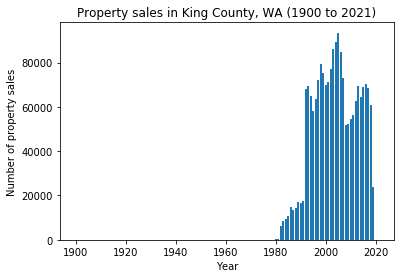

In [19]:
plt.bar(x=[sale[0] for sale in sale_year_count],
        height=[sale[1] for sale in sale_year_count])
plt.xlabel("Year")
plt.ylabel("Number of property sales")
plt.title("Property sales in King County, WA (1900 to 2021)")
plt.savefig("visuals/raw_sales_count_by_year.png",
            dpi=150)
plt.show()

By the looks of our number of property sales over time bar plot, it looks like property sales in King County, WA started taking off in the 1980s. They continued climbing into the early 2000s. Despite the recession reducing the number of home sales in the late 2000s, it looks like they are continuing to climb.

### 2. After removing the one record that took place in 2021, what is the average [nominal](https://www.stlouisfed.org/publications/inside-the-vault/fall-2007/nominal-vs-real-oil-prices) property sales price in King County, WA?

In [135]:
list(df.head())

['ExciseTaxNbr',
 'Major',
 'Minor',
 'DocumentDate',
 'SalePrice',
 'RecordingNbr',
 'Volume',
 'Page',
 'PlatNbr',
 'PlatType',
 'PlatLot',
 'PlatBlock',
 'SellerName',
 'BuyerName',
 'PropertyType',
 'PrincipalUse',
 'SaleInstrument',
 'AFForestLand',
 'AFCurrentUseLand',
 'AFNonProfitUse',
 'AFHistoricProperty',
 'SaleReason',
 'PropertyClass',
 'SaleWarning']

In [121]:
df['SalePrice'].mean()

591399.154256318

In [77]:
df['year'] = df['DocumentDate'].year 
df['month'] = df['DocumentDate'].month 
df['day'] = df['DocumentDate'].day 

AttributeError: 'Series' object has no attribute 't'

13317

In [57]:
sale_year_count

[(1900, 1), (1934, 1)]

### 3. Which property has been sold the most in King County, WA throughout time?

This questions requires you to create a <strong>P</strong>arcel <strong>I</strong>dentification <strong>N</strong>umber (PIN). To learn how to do this, read the "Attribute Information" section on the Parcel webpage from the [King County Geographic Information System (KCGI)](https://www5.kingcounty.gov/sdc/Metadata.aspx?Layer=parcel).

In [129]:
df['ExciseTaxNbr'].value_counts()

2639648    689
2673898    685
866727     678
2003154    274
2003168    267
1610536    244
2582042    228
2590623    228
2173615    226
2173618    226
2075480    225
2075482    225
1958718    223
2472981    217
2340585    212
2254910    207
2254901    207
1342560    204
2665724    204
1947128    204
1544280    204
2674515    203
2493167    201
2089958    199
2089957    199
2617721    198
2089947    197
2985982    197
1862077    193
862188     191
          ... 
2429416      1
2425322      1
2367950      1
2374093      1
2372044      1
2361803      1
2607539      1
2617780      1
2619829      1
2613686      1
2615735      1
2593208      1
2595257      1
2589114      1
2591163      1
2601404      1
2603453      1
2597310      1
2599359      1
2380224      1
2382273      1
2376130      1
2378179      1
2388420      1
2390469      1
2384326      1
2363848      1
2365897      1
2359754      1
692562       1
Name: ExciseTaxNbr, Length: 1852877, dtype: int64

### 4. Who are the top 5 sellers in terms of who has sold the most property in King County, WA throughout time?

In [143]:
seller = df['SellerName'].value_counts()
seller.head(5)

NORTHWEST TRUSTEE SERVICES INC                        13317
QUADRANT CORPORATION                                   5416
SSHI LLC                                               4007
CENTEX HOMES                                           3087
FEDERAL NATIONAL MORTGAGE ASSOCIATION                  2884
Name: SellerName, dtype: int64

### 5. From 2009 to 2019, which buyer has bought the most property in King County, WA?

In [142]:
buyer = df['BuyerName'].value_counts()
buyer.head(5)

KING COUNTY                                           4490
FEDERAL NATIONAL MORTGAGE ASSOCIATION                 3511
SEATTLE CITY OF                                       2824
FEDERAL NATIONAL MORTGAGE ASSN                        2589
QUADRANT CORPORATION                                  2119
Name: BuyerName, dtype: int64